step 6 : PROFILING SEGMENTS

First few rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count

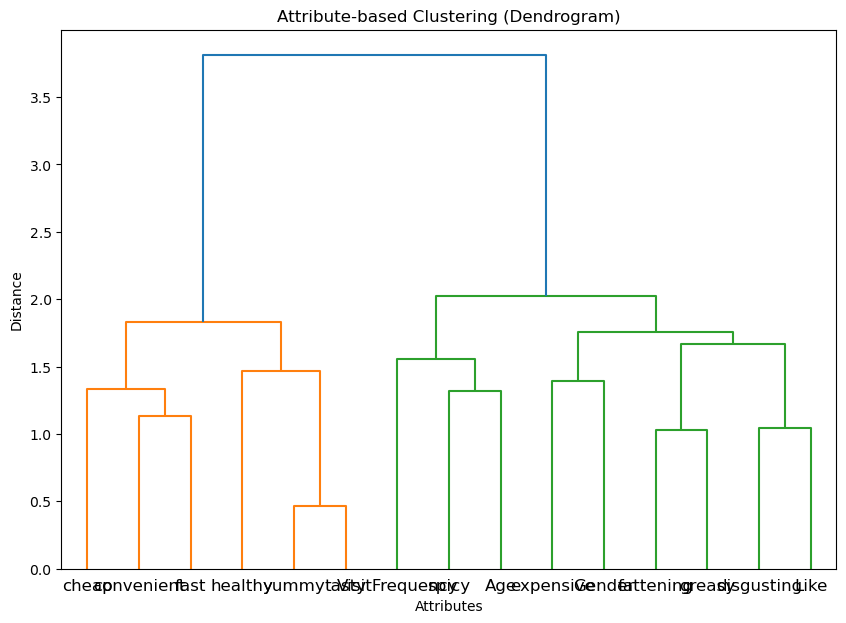

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


data = pd.read_csv('mcdonalds.csv')


print("First few rows of the dataset:")
print(data.head())


for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])


data_numeric = data.select_dtypes(include=[np.number])


data_numeric = data_numeric.dropna()


print("\nData types after encoding:")
print(data_numeric.info()) 


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


cosine_sim = cosine_similarity(data_scaled.T)


Z = linkage(1 - cosine_sim, 'ward') 
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data_numeric.columns, orientation='top')
plt.title('Attribute-based Clustering (Dendrogram)')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


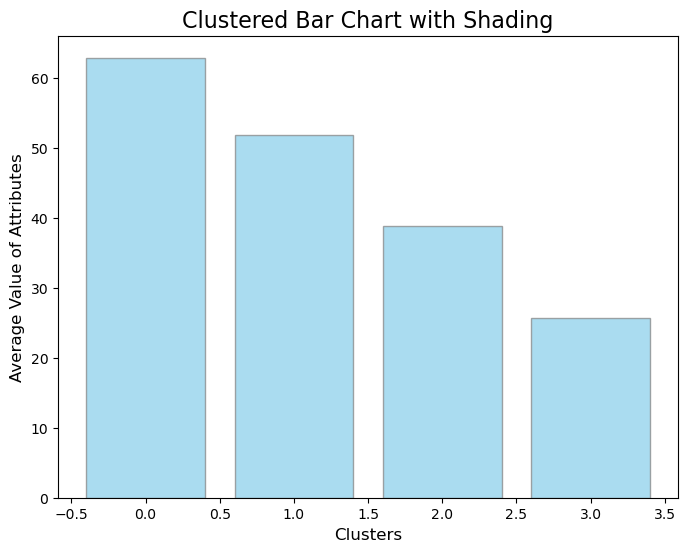

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


data = pd.read_csv('mcdonalds.csv')


print(data.head())


data = data.dropna()


data_numeric = data.select_dtypes(include=[np.number])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


n_clusters = 4  # Example: 4 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)


cluster_means = data_numeric.groupby(data['Cluster']).mean()


cluster_means_values = cluster_means.mean(axis=1) 

cluster_order = cluster_means_values.argsort().values 
reversed_order = np.flip(cluster_order)


cluster_means_reordered = cluster_means_values.iloc[reversed_order]


plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(cluster_means_reordered)), cluster_means_reordered, color='skyblue')


for bar in bars:
    bar.set_edgecolor('gray')
    bar.set_alpha(0.7)  


plt.title('Clustered Bar Chart with Shading', fontsize=16)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Average Value of Attributes', fontsize=12)


plt.show()


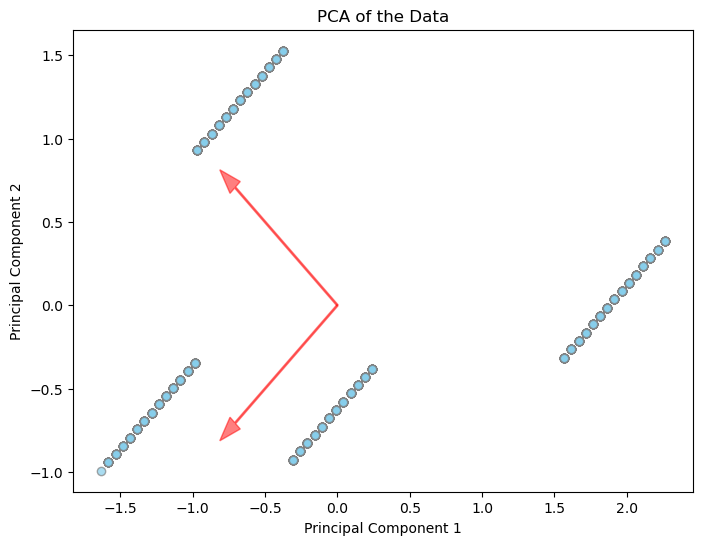

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data_numeric = data.select_dtypes(include=[np.number])


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='skyblue', edgecolors='gray', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Data')


for i in range(pca.components_.shape[0]):
    plt.arrow(0, 0, pca.components_[i, 0], pca.components_[i, 1],
              color='red', alpha=0.5, width=0.01, head_width=0.1)

plt.show()
